# Criando os nomes

In [201]:
import pandas as pd

In [202]:
# importa base de dados com 400 nomes
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

URLError: <urlopen error [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente>

In [ ]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [203]:
nomes = pd.concat(frames)['nome'].to_frame()

In [204]:
nomes.sample(5)

,nome
88,GILMAR
124,LAIS
123,IVONE
191,ERICK
180,EDER


# Incluindo ID dos alunos

In [205]:
import numpy as np

In [206]:
# Criando números aleatórios
np.random.seed(123)

In [207]:
total_alunos = len(nomes)
total_alunos

400

In [208]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [209]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [210]:
# Criando domínios de e-mail
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [211]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [212]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [213]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela cursos

In [214]:
!pip3 install html5lib
!pip3 install lxml

In [215]:
import html5lib

In [216]:
# Ler a armazenar uma tabela com nomes dos cursos
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [217]:
type(cursos)

list

In [218]:
cursos = cursos[0]

In [219]:
type(cursos)

pandas.core.frame.DataFrame

In [220]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [221]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [222]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [223]:
cursos['id'] = cursos.index + 1

In [224]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [225]:
cursos = cursos.set_index('id')

In [226]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [227]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [228]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [229]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [230]:
import seaborn as sns

C:\Users\Alexandre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

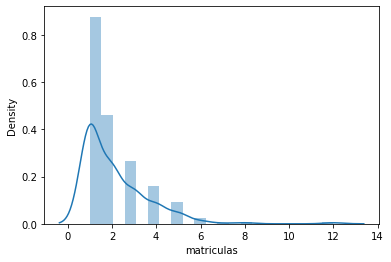

In [231]:
sns.distplot(nomes.matriculas)

In [232]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

In [233]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


# Selecionando cursos

In [234]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,2
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,4
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,5
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,4
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,1


In [235]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [236]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [237]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12


In [238]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,74,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [239]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
142,HUGO,378,@servicodoemail.com,hugo@servicodoemail.com,1
150,EDMILSON,326,@dominiodoemail.com.br,edmilson@dominiodoemail.com.br,1
161,DAMIAO,349,@servicodoemail.com,damiao@servicodoemail.com,4


In [240]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [241]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12


In [242]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(
    cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})


In [243]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Saída em diferentes formatos

In [244]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [245]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [246]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,58,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,74,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,39,Código limpo com C#


In [247]:
matriculas_json = matriculas_por_curso.to_json()

In [248]:
matriculas_json

'{"quantidade_de_alunos":{"1":58,"2":31,"3":53,"4":4,"5":12,"6":74,"7":32,"8":18,"9":59,"10":39,"11":61,"12":65,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":74,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [249]:
matriculas_html = matriculas_por_curso.to_html()

In [250]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>58</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>74</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando um Banco SQL

In [251]:
!pip install sqlalchemy 

In [252]:
from sqlalchemy import create_engine, MetaData, Table

In [253]:
engine = create_engine('sqlite:///:memory:')

In [254]:
engine

Engine(sqlite:///:memory:)

In [255]:
type(engine)

sqlalchemy.engine.base.Engine

In [256]:
matriculas_por_curso.to_sql('matriculas', engine)

In [257]:
print(engine.table_names())

['matriculas']


# Buscando do Banco sql

In [258]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [259]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [260]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [261]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=[
                                      'nome_do_curso', 'quantidade_de_alunos'])


In [262]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,58
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,74
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,39


In [263]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [264]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,74
10,Preparatório para certificação Java,61
11,Hardware básico,65
18,Boas práticas em Java,74


# Escrevendo no banco

In [265]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [266]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [267]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,58,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,74,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [268]:
matriculas

,id_aluno,id_curso
0,235,6
1,43,16
2,304,6
3,304,11
4,304,12
...,...,...
849,323,10
850,323,3
851,383,6
852,366,3


In [269]:
id_curso = 19
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
27,218,19
56,173,19
67,172,19
71,284,19
80,350,19
...,...,...
749,169,19
797,254,19
808,33,19
826,97,19


In [270]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
58,ALESSANDRA,193,@servicodoemail.com,alessandra@servicodoemail.com,1
61,BIANCA,21,@servicodoemail.com,bianca@servicodoemail.com,3
178,DENILSON,335,@servicodoemail.com,denilson@servicodoemail.com,4
195,ROSANE,227,@dominiodoemail.com.br,rosane@dominiodoemail.com.br,1
124,CESAR,2,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,1


In [271]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
7,19,SOLANGE,@dominiodoemail.com.br,solange@dominiodoemail.com.br,2
9,19,RENAN,@dominiodoemail.com.br,renan@dominiodoemail.com.br,3
33,19,CHARLES,@servicodoemail.com,charles@servicodoemail.com,3
36,19,KARINA,@dominiodoemail.com.br,karina@dominiodoemail.com.br,2
44,19,NICOLAS,@dominiodoemail.com.br,nicolas@dominiodoemail.com.br,5
...,...,...,...,...,...
391,19,RAQUEL,@dominiodoemail.com.br,raquel@dominiodoemail.com.br,3
393,19,JOSUE,@dominiodoemail.com.br,josue@dominiodoemail.com.br,3
394,19,JOELMA,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,4


In [272]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
7      SOLANGE
9        RENAN
33     CHARLES
36      KARINA
44     NICOLAS
        ...   
391     RAQUEL
393      JOSUE
394     JOELMA
396    VIVIANE
399     CICERA
Name: nome, Length: 74, dtype: object

In [273]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
7,SOLANGE
9,RENAN
33,CHARLES
36,KARINA
44,NICOLAS
...,...
391,RAQUEL
393,JOSUE
394,JOELMA


In [274]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Boas práticas em Java
Name: 19, dtype: object

In [275]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Boas práticas em Java'

In [276]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [277]:
proxima_turma

,nome
id_aluno,
7,SOLANGE
9,RENAN
33,CHARLES
36,KARINA
44,NICOLAS
...,...
391,RAQUEL
393,JOSUE
394,JOELMA


In [279]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [280]:
proxima_turma.sample(3)

,Alunos do curso de Boas práticas em Java
id_aluno,
70,RAIMUNDO
7,SOLANGE
316,FRANCIELE


# Excel

In [281]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [282]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Boas práticas em Java
0,SOLANGE
1,RENAN
2,CHARLES
3,KARINA
4,NICOLAS
...,...
69,RAQUEL
70,JOSUE
71,JOELMA
72,VIVIANE
